## Apply functions to masked images

### Functions to get features of images

In [ ]:
import SimpleITK as sitk
import scipy
def volume(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  pixel_volume = img.GetSpacing()[0] * img.GetSpacing()[1] * img.GetSpacing()[2]
  return (array > 0).sum() * pixel_volume

def mean(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMean()

def max(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMaximum()

def median(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMean()

def min(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMinimum()

def sum(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetSum()

def variance(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetVariance()

def RegionalMaxima_(img: sitk.Image):
  transformed = sitk.RegionalMaxima(img)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def ZeroCrossing_(img: sitk.Image):
  transformed = sitk.ZeroCrossing(img)
  
  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def Derivative_(img: sitk.Image):
  transformed = sitk.Derivative(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()


def GradientMagnitudeRecursiveGaussian_(img: sitk.Image):
  transformed = sitk.GradientMagnitudeRecursiveGaussian(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def MorphologicalWatershed_(img: sitk.Image):
  transformed = sitk.MorphologicalWatershed(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()


def ObjectnessMeasure_(img: sitk.Image):
  transformed = sitk.ObjectnessMeasure(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()


def Toboggan_(img: sitk.Image):
  transformed = sitk.Toboggan(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def ZeroCrossingBasedEdgeDetection_(img: sitk.Image):
  transformed = sitk.ZeroCrossingBasedEdgeDetection(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def Z_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[0]

def X_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[1]

def Y_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[2]

fn = [volume,
      max,
      median,  #HC
      #min,  #por mascara minimo saldra 0 
      sum, # HC 
      variance,
      RegionalMaxima_, #HC
      ZeroCrossing_,  #HC
      mean, # HC
      #Derivative_, # constant value
      GradientMagnitudeRecursiveGaussian_,#HC
      MorphologicalWatershed_,
      ObjectnessMeasure_,  #HC
      Toboggan_,  #HC
      ZeroCrossingBasedEdgeDetection_ , #HC,
      Z_,
      X_,
      Y_
]


def get_feature_header():
  return [f.__name__ for f in fn]

def get_feature_vector(img : sitk.Image):
  return [f(img) for f in fn]


## Feature extraction Lacunar and MCA examples

### lacunar and MCA Ids

In [ ]:
LACUNAR_IDS = [
  'c0001s0004t01',
  'c0001s0005t01',
  'c0002s0001t01',
  'c0002s0002t01',
  'c0002s0003t01',
  'c0002s0004t01',
  'c0002s0005t01',
  'c0002s0008t01',
  'c0002s0014t01',
  'c0002s0022t01',
  'c0002s0024t01',#
  'c0003s0001t01',
  'c0003s0002t01',
  'c0003s0003t01',
  'c0003s0004t01',
  'c0003s0005t01',
  'c0003s0006t01',
  'c0003s0007t01',
  'c0003s0008t01',
  'c0003s0009t01',
  'c0003s0010t01',
  'c0003s0011t01',
  'c0003s0012t01',
  'c0003s0013t01',
  'c0003s0014t01',
  'c0003s0015t01',
  'c0003s0016t01',
  'c0003s0017t01',
  'c0003s0018t01',
  'c0003s0019t01',
  'c0003s0020t01',
  'c0003s0021t01',
  'c0003s0022t01',
  'c0003s0023t01',
  'c0003s0024t01',
  'c0003s0025t01',
  'c0003s0026t01',
  'c0003s0027t01',
  'c0003s0028t01',
  'c0003s0029t01',
  'c0003s0031t01',
  'c0003s0032t01',
  'c0003s0033t01',
  'c0003s0034t01',
  'c0003s0035t01',
  'c0003s0036t01',
  'c0003s0037t01',
  'c0003s0038t01',
  'c0003s0039t01',
  'c0003s0040t01',
  'c0003s0041t01',
  'c0003s0042t01',
  'c0003s0043t01',
  'c0003s0044t01',
  'c0003s0045t01',
  'c0003s0048t01',
  'c0003s0049t01',
  'c0003s0050t01',
  'c0003s0051t01',
  'c0003s0052t01',
  'c0003s0053t01',
  'c0003s0054t01',
  'c0003s0055t01',
  'c0003s0056t01',
  'c0004s0003t01',
  'c0004s0005t01',
  'c0004s0007t01',
  'c0004s0012t01',
  'c0004s0014t01',
  'c0004s0015t01',
  'c0004s0016t01',
  'c0004s0018t01',
  'c0004s0021t01',
  'c0004s0022t01',
  'c0004s0024t01',
  'c0004s0025t01',
  'c0004s0026t01',
  'c0004s0027t01',
  'c0004s0029t01',
  'c0004s0030t01',
  'c0004s0032t01',
  'c0004s0034t01',
  'c0005s0006t01',
  'c0005s0008t01',
  'c0005s0010t01',
  'c0005s0014t01',
  'c0005s0018t01',
  'c0005s0026t01',
  'c0005s0027t01',
  'c0005s0029t01',
  'c0005s0035t01',
  'c0005s0042t01',
  'c0005s0043t01',
  'c0005s0044t01',
  'c0005s0049t01',
  'c0006s0001t01',
  'c0006s0004t01',
  'c0006s0005t01',
  'c0006s0010t01',
  'c0006s0014t01',
  'c0006s0019t01',
  'c0006s0020t01',
  'c0007s0004t01',
  'c0007s0008t01',
  'c0007s0010t01',
  'c0007s0012t01',
  'c0007s0013t01',
  'c0007s0014t01',
  'c0007s0015t01',
  'c0007s0016t01',
  'c0007s0017t01',
  'c0007s0020t01',
  'c0007s0024t01',
  'c0007s0025t01',
  'c0007s0026t01',
  'c0007s0028t01',
  'c0007s0030t01',
  'c0007s0031t01',
  'c0007s0035t01',
  'c0007s0036t01',
  'c0008s0002t01',
  'c0008s0013t01',
  'c0008s0032t01',
  'c0009s0001t01',
  'c0009s0003t01',
  'c0009s0004t01',
  'c0010s0002t01',
  'c0010s0002t02',
  'c0010s0003t01',
  'c0010s0003t02',
  'c0010s0006t01',
  'c0010s0008t01',
  'c0010s0013t01',
  'c0010s0013t02',
  'c0010s0014t01',
  'c0010s0025t01',
  'c0010s0025t02',
  'c0010s0029t01',
  'c0010s0031t01',
  'c0010s0034t01',
  'c0010s0044t01',
  'c0010s0044t02',
  'c0010s0046t01',
  'c0011s0002t01',
  'c0011s0006t01',
  'c0011s0007t01',
  'c0011s0011t01',
  'c0011s0014t01',
  'c0011s0015t01',
]
MCA_IDS = [
  'c0001s0006t01',
  'c0001s0007t01',
  'c0001s0008t01',
  'c0002s0007t01',
  'c0002s0009t01',
  'c0002s0011t01',  
  'c0002s0012t01',
  'c0002s0013t01',
  'c0002s0015t01',
  'c0002s0018t01',
  'c0002s0019t01',
  'c0002s0020t01',
  'c0002s0021t01',
  'c0002s0025t01',  
  'c0003s0030t01',#
  'c0004s0001t01',
  'c0004s0002t01',
  'c0004s0009t01',
  'c0004s0010t01',
  'c0004s0011t01',
  'c0004s0013t01',
  'c0004s0019t01',
  'c0004s0020t01',
  'c0004s0031t01',
  'c0004s0033t01',
  'c0005s0003t01',
  'c0005s0007t01',
  'c0005s0009t01',
  'c0005s0013t01',
  'c0005s0017t01',
  'c0005s0021t01',
  'c0005s0024t01',
  'c0005s0030t01',
  'c0005s0036t01',
  'c0006s0007t01',
  'c0006s0008t01',
  'c0007s0001t01',
  'c0007s0002t01',
  'c0007s0003t01',
  'c0007s0005t01',
  'c0007s0006t01',
  'c0007s0007t01',
  'c0007s0018t01',
  'c0007s0019t01',
  'c0007s0021t01',
  'c0007s0023t01',
  'c0007s0027t01',
  'c0007s0029t01',
  'c0007s0032t01',
  'c0007s0033t01',
  'c0007s0034t01',
  'c0008s0001t01',
  'c0008s0003t01',
  'c0008s0006t01',
  'c0008s0007t01',
  'c0008s0008t01',
  'c0008s0009t01',
  'c0008s0010t01',
  'c0008s0011t01',
  'c0008s0012t01',
  'c0008s0014t01',
  'c0008s0015t01',
  'c0008s0016t01',
  'c0008s0017t01',
  'c0008s0018t01',
  'c0008s0019t01',
  'c0008s0020t01',
  'c0008s0021t01',
  'c0008s0022t01',
  'c0008s0023t01',
  'c0008s0024t01',
  'c0008s0025t01',
  'c0008s0026t01',
  'c0008s0027t01',
  'c0008s0028t01',
  'c0008s0029t01',
  'c0008s0030t01',
  'c0008s0031t01',
  'c0008s0033t01',
  'c0009s0002t01',
  'c0009s0005t01',
  'c0009s0006t01',
  'c0009s0007t01',
  'c0009s0008t01',
  'c0009s0009t01',
  'c0009s0010t01',
  'c0009s0011t01',
  'c0009s0012t01',
  'c0010s0001t01',
  'c0010s0004t01',
  'c0010s0005t01',
  'c0010s0005t02',
  'c0010s0007t01',
  'c0010s0018t01',
  'c0010s0020t01',
  'c0010s0020t02',
  'c0010s0021t01',
  'c0010s0024t01',
  'c0010s0032t01',
  'c0010s0037t01',
  'c0011s0001t01',
  'c0011s0003t01',
  'c0011s0004t01',
  'c0011s0005t01',
  'c0011s0008t01',
  'c0011s0009t01',
  'c0011s0012t01',
  'c0011s0013t01'
]

### Build csv

In [ ]:
def id_from_path(path:str) -> str:
  #may need to be updated if data location change
  return path.split('/')[4]

In [ ]:
from glob import glob
from pprint import pprint
path_proccesed_masked="/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/native_processed_masked"

folders =  sorted(glob(f'{path_proccesed_masked}/*'))
print(len(folders))
pprint(folders[:3])


257
['/content/drive/MyDrive/integradora_fiec/datasets/paper lesions '
 'extended/native_processed_masked/c0001s0004t01_processed_masked.nii.gz',
 '/content/drive/MyDrive/integradora_fiec/datasets/paper lesions '
 'extended/native_processed_masked/c0001s0005t01_processed_masked.nii.gz',
 '/content/drive/MyDrive/integradora_fiec/datasets/paper lesions '
 'extended/native_processed_masked/c0001s0006t01_processed_masked.nii.gz']


In [ ]:
def id_from_path(path:str) -> str:
  #may need to be updated if data location change
  return path.split('/')[8][:-24]

In [ ]:
#just MCA and lacunar
whole = MCA_IDS + LACUNAR_IDS
folders_filtered = [ f 
                    for f in folders 
                    if id_from_path(f) in whole]
len(folders_filtered)

257

In [ ]:
from pprint import pprint

header = ["_id"]
header += get_feature_header()
header += ["territory"]
pprint(header)

['_id',
 'volume',
 'max',
 'median',
 'sum',
 'variance',
 'RegionalMaxima_',
 'ZeroCrossing_',
 'mean',
 'GradientMagnitudeRecursiveGaussian_',
 'MorphologicalWatershed_',
 'ObjectnessMeasure_',
 'Toboggan_',
 'ZeroCrossingBasedEdgeDetection_',
 'Z_',
 'X_',
 'Y_',
 'territory']


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
import pandas as pd

features = pd.DataFrame(columns=header)
print(header)
for i, f in enumerate( folders_filtered):
  xpath = f
  ximg = sitk.ReadImage(xpath, sitk.sitkFloat32)

  id = id_from_path(f)
  feature_row = [id]
  feature_row += get_feature_vector(ximg)

  if id in LACUNAR_IDS:
    feature_row.append(0)
  elif id in MCA_IDS:
    feature_row.append(1)
  else:
    print(i, xpath)
    raise ValueError

  features.loc[i] = feature_row
  print(i, feature_row)
  #if i == 0 : break


['_id', 'volume', 'max', 'median', 'sum', 'variance', 'RegionalMaxima_', 'ZeroCrossing_', 'mean', 'GradientMagnitudeRecursiveGaussian_', 'MorphologicalWatershed_', 'ObjectnessMeasure_', 'Toboggan_', 'ZeroCrossingBasedEdgeDetection_', 'Z_', 'X_', 'Y_', 'territory']
0 ['c0001s0004t01', 1371.0, 64.7186050415039, 0.00781894065353814, 67831.56984329224, 0.4091125576729032, 148.0, 730.0, 0.00781894065353814, 35891.884181927904, 8678956.0, 12150.460976456292, 17354629.0, 3169.0, 90.74210222521258, 118.23223638664491, 74.06574165027506, 0]
1 ['c0001s0005t01', 508.0, 64.70045471191406, 0.00302340987791062, 26228.954456329346, 0.16665457490894636, 62.0, 918.0, 0.00302340987791062, 25905.82850827832, 8675289.0, 10580.568755705084, 17350578.0, 5204.0, 82.83602335439011, 122.78665176103422, 111.58600815389684, 0]
2 ['c0001s0006t01', 322.0, 61.57183837890625, 0.001254279669398146, 10881.238618853373, 0.0461777907865263, 24.0, 533.0, 0.001254279669398146, 10270.710793338518, 8675289.0, 2855.135213993

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


45 ['c0003s0021t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]
46 ['c0003s0022t01', 37.0, 65.55229949951172, 0.0002590747481888925, 2247.548313140869, 0.015910607033441236, 10.0, 123.0, 0.0002590747481888925, 2829.6067494375343, 8675289.0, 1293.112375547178, 17350578.0, 1311.0, 66.51891033502434, 122.92626919232632, 118.00466130874157, 0]
47 ['c0003s0023t01', 141.0, 64.64445495605469, 0.0008267236184050948, 7172.066312789917, 0.045512495632149604, 22.0, 149.0, 0.0008267236184050948, 6500.460478598987, 8675266.0, 2050.287504445878, 17350611.0, 787.0, 90.3238920352453, 113.56976548903485, 72.99857401948417, 0]
48 ['c0003s0024t01', 2081.0, 63.42872619628906, 0.010180683839428295, 88320.37452467006, 0.47644481708803943, 261.0, 1866.0, 0.010180683839428295, 59386.457283445416, 8683240.0, 22600.28091667127, 17360691.0, 7504.0, 86.103302457391, 125.96038273992099, 69.86822373739685, 0]
49 ['c0003s0025t01', 2131.0, 64.57691192626953, 

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


72 ['c0003s0050t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]
73 ['c0003s0051t01', 177.0, 62.84138870239258, 0.0010651378346057476, 9240.378540039062, 0.05793785215092847, 21.0, 266.0, 0.0010651378346057476, 9407.999498105926, 8675289.0, 3234.053842491936, 17350578.0, 1985.0, 93.71562741653665, 117.75137188654831, 121.22084394101934, 0]
74 ['c0003s0052t01', 209.0, 62.7160758972168, 0.0012056775132476968, 10459.600868225098, 0.0617271492228427, 27.0, 235.0, 0.0012056775132476968, 8853.721425058842, 8675280.0, 3537.85907239886, 17350627.0, 1296.0, 78.41743411476558, 125.00955849217745, 69.50627598425682, 0]
75 ['c0003s0053t01', 368.0, 61.618080139160156, 0.0019484272429277807, 16903.169427871704, 0.09931637312529011, 43.0, 369.0, 0.0019484272429277807, 13824.916088454866, 8675345.0, 4665.114646239555, 17350871.0, 1780.0, 97.34906017616566, 123.5298917731232, 70.84233420772426, 0]
76 ['c0003s0054t01', 3355.0, 67.37403106689453, 

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


77 ['c0003s0055t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]
78 ['c0003s0056t01', 270.0, 62.47816848754883, 0.0014852155561814481, 12884.6741771698, 0.07545584599864365, 27.0, 256.0, 0.0014852155561814481, 10341.51784898578, 8675295.0, 3904.0163757056, 17350789.0, 1147.0, 92.64695863854803, 114.59331389016357, 120.72879392849528, 0]
79 ['c0004s0001t01', 101948.0, 76.53031921386719, 0.4264497899925107, 3699575.1721743383, 18.796822264926217, 4024.0, 25264.0, 0.4264497899925107, 1239675.9833020053, 46193956.0, 393505.1531317794, 75714194.0, 76898.0, 96.2078363759508, 133.11298959398837, 142.11339522496846, 1]
80 ['c0004s0002t01', 91139.0, 67.15545654296875, 0.3348195982013047, 2904656.7772601983, 13.199151355877888, 3721.0, 20899.0, 0.3348195982013047, 920491.5369215925, 42107300.0, 284379.947583052, 69686248.0, 71335.0, 65.28105760999046, 127.4749531008297, 144.07795653734772, 1]
81 ['c0004s0003t01', 716.0, 63.29646301269531,

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


118 ['c0005s0024t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 1]
119 ['c0005s0026t01', 5793.0, 65.52430725097656, 0.03628015774023015, 314740.85336208344, 2.0288870514400807, 427.0, 3997.0, 0.03628015774023015, 164303.29590204824, 8712421.0, 49234.296804511134, 17393938.0, 14917.0, 99.22329900073191, 120.41803060496733, 72.13344504621986, 0]
120 ['c0005s0027t01', 148.0, 63.315589904785156, 0.0007287151051165584, 6321.814135551523, 0.0333363068036792, 17.0, 297.0, 0.0007287151051165584, 6316.423043560335, 8675289.0, 2083.988128334284, 17350578.0, 1766.0, 90.36159556067808, 148.3346909331488, 145.3818594360361, 0]
121 ['c0005s0029t01', 3918.0, 64.8548355102539, 0.025753892511150282, 223422.46040916443, 1.479103328963567, 275.0, 2005.0, 0.025753892511150282, 99813.72284892485, 8701211.0, 27801.177391065707, 17384429.0, 8722.0, 104.78030242181026, 118.39447911719397, 70.64840420124685, 0]
122 ['c0005s0030t01', 27358.0, 66.757827758

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


137 ['c0006s0020t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]
138 ['c0007s0001t01', 139925.0, 74.0974349975586, 0.5114906873311817, 4437329.53340664, 20.77642521683728, 5935.0, 35743.0, 0.5114906873311817, 1651040.9544206583, 85085782.0, 557401.8649079365, 144862471.0, 103429.0, 81.29090192408496, 127.89556967770389, 140.6924849039692, 1]
139 ['c0007s0002t01', 22070.0, 64.90670013427734, 0.13842211101551088, 1200851.8170496405, 7.824296154253755, 1250.0, 10164.0, 0.13842211101551088, 462414.0972761533, 9288185.0, 156335.4344791193, 18125922.0, 30454.0, 120.21454657707926, 100.90615853775067, 129.27523771761847, 1]
140 ['c0007s0003t01', 18672.0, 64.62937927246094, 0.10913111143691137, 946743.9306064114, 5.926304553176281, 1253.0, 12038.0, 0.10913111143691137, 491298.05836584704, 8844635.0, 156221.57609305234, 17615477.0, 36117.0, 108.60259422869815, 92.25506390703517, 68.3615084339459, 1]
141 ['c0007s0004t01', 1685.0, 64.7301

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


215 ['c0010s0002t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]


/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


216 ['c0010s0002t02', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]
217 ['c0010s0003t01', 7650.0, 64.81941223144531, 0.046682777046285914, 404986.5821990967, 2.511110553083255, 476.0, 2794.0, 0.046682777046285914, 149990.7441135827, 8808686.0, 47914.6058470351, 17548007.0, 8705.0, 79.89257381909093, 131.0214611747974, 124.0855555748624, 0]
218 ['c0010s0003t02', 2752.0, 68.83668518066406, 0.01661411812676885, 144132.2762298584, 0.910607695266315, 226.0, 1342.0, 0.01661411812676885, 68842.5557468829, 8681890.0, 21427.190614387422, 17364108.0, 4202.0, 84.79394575893929, 133.2149265555163, 119.19073695668665, 0]
219 ['c0010s0004t01', 11970.0, 69.35982513427734, 0.07554287674511183, 655356.2876552244, 4.177897143726747, 697.0, 6783.0, 0.07554287674511183, 276653.9263565102, 8803511.0, 77280.55804528554, 17519898.0, 19559.0, 105.14460875791897, 96.41878730551697, 57.36156958885582, 1]
220 ['c0010s0005t01', 1570.0, 63.81072998046875, 0.0

/usr/local/lib/python3.10/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in double_scalars
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


225 ['c0010s0013t01', 0.0, 0.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 0.0, 0.0, 8675289.0, 0.0, 17350578.0, 0.0, nan, nan, nan, 0]
226 ['c0010s0013t02', 3.0, 28.286508560180664, 9.663223758171482e-06, 83.83125877380371, 0.00027008554584416125, 1.0, 13.0, 9.663223758171482e-06, 126.98171231876081, 8675289.0, 72.75624370574951, 17350578.0, 282.0, 69.99999840734347, 159.3264069914527, 41.337421030401444, 0]
227 ['c0010s0014t01', 4630.0, 64.24549102783203, 0.026194588186420863, 227245.62275318685, 1.3432247135387072, 414.0, 4502.0, 0.026194588186420863, 147444.31039206008, 8683399.0, 47959.87219356624, 17364222.0, 18626.0, 91.20919110531385, 129.9228856955394, 110.62667770493555, 0]
228 ['c0010s0018t01', 33.0, 57.63567352294922, 0.00016476181325260415, 1429.356346130371, 0.007515405829673008, 7.0, 97.0, 0.00016476181325260415, 1658.3573415414578, 8675289.0, 943.0516998767853, 17350578.0, 886.0, 96.56210411765464, 135.19936978629656, 156.91127395022002, 1]
229 ['c0010s0020t01', 188.0, 62.379127502

In [ ]:
features.shape

(257, 18)

In [ ]:
features[features.volume != 0].shape

(249, 18)

In [ ]:
#features = features[features.volume != 0]

In [ ]:
out_path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
out_path+= "20230523_all_features.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

## Correlation Analysis

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended"
path+= "20230523_all_features.csv"
features = pd.read_csv(path)

In [ ]:
features = features[features.volume != 0]
features = features.drop(columns=['_id','territory'])
features.shape

(249, 16)

In [ ]:
corrmat = features.corr() 
corrmat

,volume,max,median,sum,variance,RegionalMaxima_,ZeroCrossing_,mean,GradientMagnitudeRecursiveGaussian_,MorphologicalWatershed_,ObjectnessMeasure_,Toboggan_,ZeroCrossingBasedEdgeDetection_,Z_,X_,Y_
volume,1.000000,0.457783,0.984169,0.984169,0.948987,0.977703,0.905995,0.984169,0.939397,0.850185,0.924704,0.842209,0.959567,-0.057462,0.060813,0.155749
max,0.457783,1.000000,0.493402,0.493402,0.515181,0.520342,0.559036,0.493402,0.540306,0.255940,0.545692,0.250187,0.530236,-0.078277,-0.028498,0.214315
median,0.984169,0.493402,1.000000,1.000000,0.988494,0.978288,0.932585,1.000000,0.963925,0.772771,0.947810,0.762730,0.965567,-0.028227,0.060525,0.186557
sum,0.984169,0.493402,1.000000,1.000000,0.988494,0.978288,0.932585,1.000000,0.963925,0.772771,0.947810,0.762730,0.965567,-0.028227,0.060525,0.186557
variance,0.948987,0.515181,0.988494,0.988494,1.000000,0.962458,0.941438,0.988494,0.973487,0.681239,0.957850,0.670167,0.953014,0.000189,0.057285,0.206748
RegionalMaxima_,0.977703,0.520342,0.978288,0.978288,0.962458,1.000000,0.961894,0.978288,0.980014,0.769528,0.976862,0.761700,0.984499,-0.069898,0.061856,0.197044
ZeroCrossing_,0.905995,0.559036,0.932585,0.932585,0.941438,0.961894,1.000000,0.932585,0.983560,0.615548,0.988009,0.606618,0.979062,-0.036708,0.047552,0.221987
mean,0.984169,0.493402,1.000000,1.000000,0.988494,0.978288,0.932585,1.000000,0.963925,0.772771,0.947810,0.762730,0.965567,-0.028227,0.060525,0.186557
GradientMagnitudeRecursiveGaussian_,0.939397,0.540306,0.963925,0.963925,0.973487,0.980014,0.983560,0.963925,1.000000,0.652183,0.995688,0.642935,0.978080,-0.021094,0.058099,0.210893
MorphologicalWatershed_,0.850185,0.255940,0.772771,0.772771,0.681239,0.769528,0.615548,0.772771,0.652183,1.000000,0.635873,0.999772,0.741550,-0.058326,-0.011794,0.033260


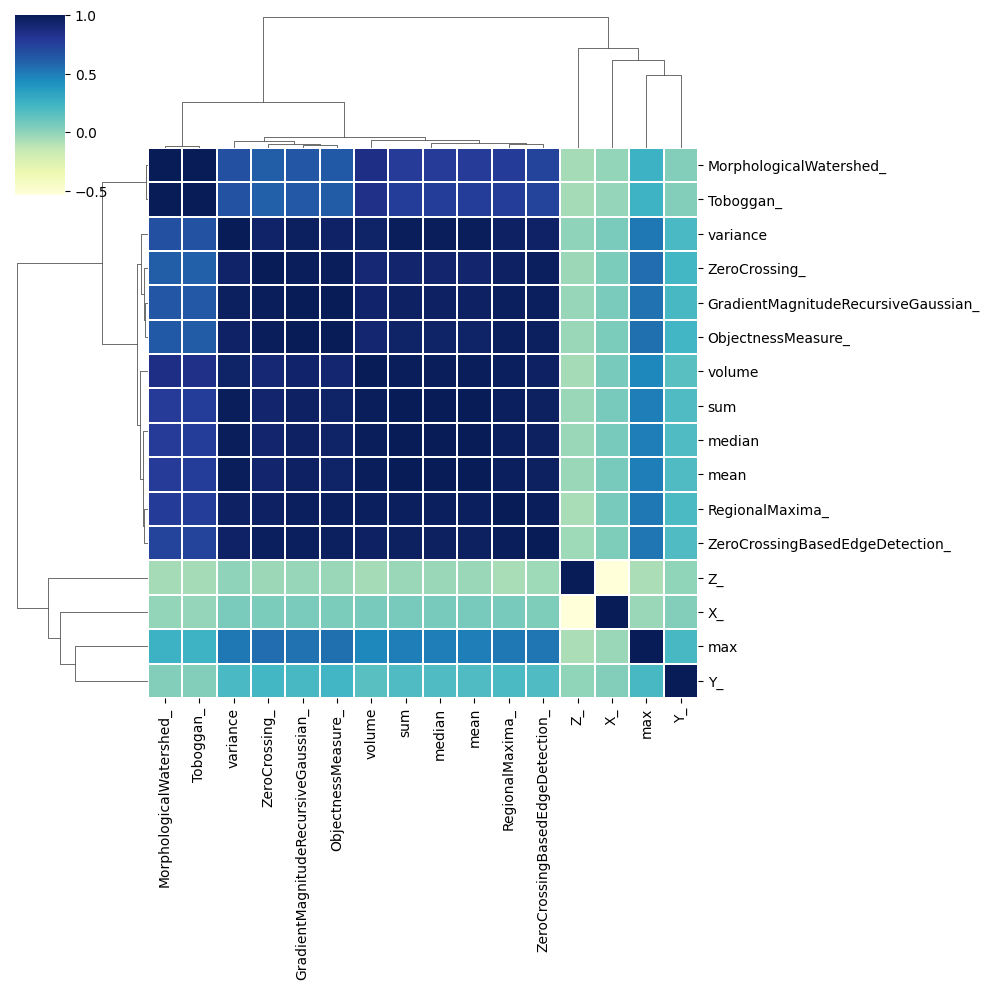

In [ ]:
# https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/#:~:text=To%20remove%20the%20correlated%20features,the%20columns%20of%20the%20dataframe.
# https://h1ros.github.io/posts/drop-highly-correlated-features/
# https://www.geeksforgeeks.org/exploring-correlation-in-python/

import seaborn as sns 
import matplotlib.pyplot as plt

#f, ax = plt.subplots(figsize =(9, 8)) 
#sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 

In [ ]:
# Index(['volume', 'max', 'median', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'], dtype='object')

import numpy as np
#https://h1ros.github.io/posts/drop-highly-correlated-features/
threshold = 0.95

df_corr = corrmat
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_columns = features.columns[columns]
selected_columns

Index(['volume', 'max', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'], dtype='object')

In [ ]:
#https://h1ros.github.io/posts/drop-highly-correlated-features/
threshold = 0.96

df_corr = corrmat
columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False

selected_columns = features.columns[columns]
selected_columns

Index(['volume', 'max', 'median', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'], dtype='object')

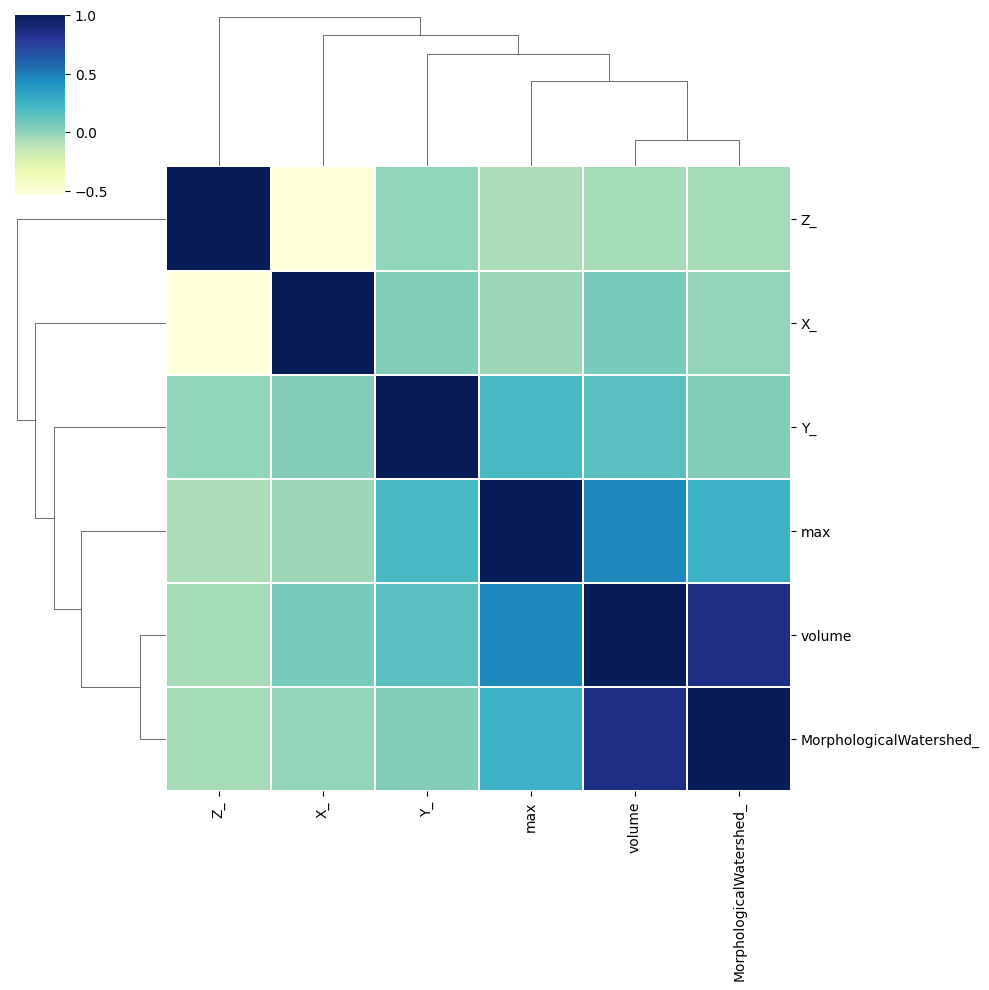

In [ ]:
corrmat2 = features[selected_columns].corr() 

cg2 = sns.clustermap(corrmat2, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg2.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg2 

constant check

In [ ]:
from sklearn.feature_selection import VarianceThreshold
qconstant_filter = VarianceThreshold(threshold=0.01)
train_features = features
qconstant_filter.fit(train_features)


VarianceThreshold(threshold=0.01)

In [ ]:
len(train_features.columns[qconstant_filter.get_support()])

16

In [ ]:
qconstant_columns = [column for column in train_features.columns
                    if column not in train_features.columns[qconstant_filter.get_support()]]

print(len(qconstant_columns))


0


In [ ]:
for column in qconstant_columns:
    print(column)

## Save csvs after correlation

### Save dataset with all feats

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
path+= "20230523_all_features.csv"
features = pd.read_csv(path)

In [ ]:
features = features[features.volume != 0]
features = features.drop(columns=['_id'])
features.shape

(249, 17)

In [ ]:
out_path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
out_path+= "20230523_all_features_without_0_vals.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

### Save dataset with only main features

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
path+= "20230523_all_features.csv"
features = pd.read_csv(path)

In [ ]:
main_cols = ['volume', 'max', 'MorphologicalWatershed_', 'Z_', 'X_', 'Y_'] + ["territory"]
features = features[features.volume != 0]
features = features[main_cols]
features.shape

(249, 7)

In [ ]:
features.head()

,volume,max,MorphologicalWatershed_,Z_,X_,Y_,territory
0,1371.0,64.718605,8678956.0,90.742102,118.232236,74.065742,0
1,508.0,64.700455,8675289.0,82.836023,122.786652,111.586008,0
2,322.0,61.571838,8675289.0,124.897929,101.469734,48.038132,1
3,46151.0,71.838448,12352275.0,103.302089,106.316971,140.542848,1
4,86718.0,66.402130,31279854.0,77.362877,149.890557,135.268499,1


In [ ]:
out_path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
out_path+= "20230523_main_features.csv"
features.astype({"territory": int}).to_csv(out_path,sep=',',index=False)

## Evaluate ML models

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# cargar la base
def load_dataset(full_path):
    # cargar como numpy array
    data = read_csv(full_path)
    data = data.values
    print(data)
    # split input - output 
    X, y = data[:, :-1], data[:, -1]
    # clases 0 y 1
    y = LabelEncoder().fit_transform(y)
    return X, y

In [ ]:
# evaluar el modelo
def evaluate_model(X, y, model):
    # procedimiento de evaluación
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluar modelo
    scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    return scores

In [ ]:
# definir modelos a probar
def get_models():
    models, names = list(), list()
    # LR
    models.append(LogisticRegression(solver='lbfgs', class_weight='balanced'))
    names.append('LR')
    # SVM
    models.append(SVC(gamma='scale', class_weight='balanced'))
    names.append('SVM')
    # RF
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')

    # MLP
    models.append(MLPClassifier(hidden_layer_sizes=(128,64,32)))
    names.append('MLP')
    return models, names

In [ ]:
# ubicación
# out_path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
# out_path+= "20230523_all_features_without_0_vals.csv"

out_path = "/content/drive/MyDrive/integradora_fiec/datasets/paper lesions extended/"
out_path+= "20230523_main_features.csv"
full_path = out_path

In [ ]:
# cargar la base
X, y = load_dataset(full_path)

[[1.37100000e+03 6.47186050e+01 8.67895600e+06 ... 1.18232236e+02
  7.40657417e+01 0.00000000e+00]
 [5.08000000e+02 6.47004547e+01 8.67528900e+06 ... 1.22786652e+02
  1.11586008e+02 0.00000000e+00]
 [3.22000000e+02 6.15718384e+01 8.67528900e+06 ... 1.01469734e+02
  4.80381315e+01 1.00000000e+00]
 ...
 [1.46500000e+03 6.28033943e+01 8.67578000e+06 ... 1.08254792e+02
  6.71730925e+01 1.00000000e+00]
 [1.36230000e+04 6.90203552e+01 9.08818200e+06 ... 1.21178726e+02
  1.22492562e+02 0.00000000e+00]
 [1.58000000e+03 6.89150620e+01 8.67772500e+06 ... 1.20762968e+02
  7.22120412e+01 0.00000000e+00]]


In [ ]:
X.shape

(249, 6)

In [ ]:
# >LR 0.844 (0.104)
# >SVM 0.929 (0.055)
# >RF 0.950 (0.040)
# >MLP 0.920 (0.065)

# (249, 16) ; all features
# >LR 0.896 (0.057)
# >SVM 0.930 (0.039)
# >RF 0.948 (0.034)
# >MLP 0.920 (0.052)

# (249, 6) ; main features
# >LR 0.863 (0.058)
# >SVM 0.935 (0.037)
# >RF 0.957 (0.027)
# >MLP 0.918 (0.051)

# repeat with 20% less of test set

# definir modelos
models, names = get_models()
results = list()
# evaluar cada modelo
for i in range(len(models)):
    # definir pipeline
    steps = [('p', PowerTransformer()), ('m',models[i])]
    pipeline = Pipeline(steps=steps)
    # evaluar pipeline y guardar resultados
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # resumen
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>LR 0.863 (0.058)
>SVM 0.935 (0.037)
>RF 0.958 (0.028)
>MLP 0.918 (0.051)


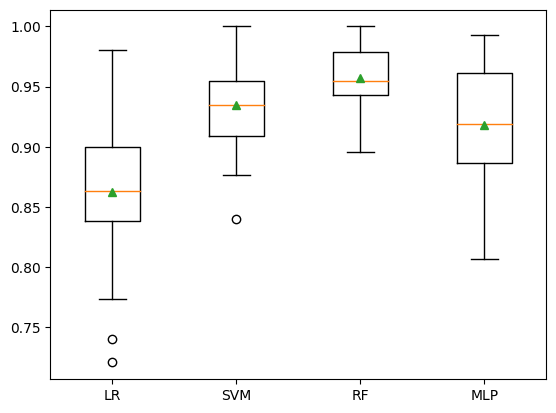

In [ ]:
# plot de los resultados
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Get a confussion matrix from RF

In [ ]:
class_names = ["Lacunar", "MCA"]

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold


def evaluate_specific_model(data_x, data_y):
    k_fold = KFold(10, shuffle=True, random_state=1)
    # k_fold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x[train_ix], data_y[train_ix], data_x[test_ix], data_y[test_ix]

        # Fit the classifier
        model = RandomForestClassifier(n_estimators=1000)
        steps = [('p', PowerTransformer()), ('m',model)]
        pipeline = Pipeline(steps=steps)
        classifier = pipeline.fit(train_x, train_y)

        # Predict the labels of the test set samples
        predicted_labels = classifier.predict(test_x)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

    return predicted_targets, actual_targets


def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
  
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0])

Confusion matrix, without normalization


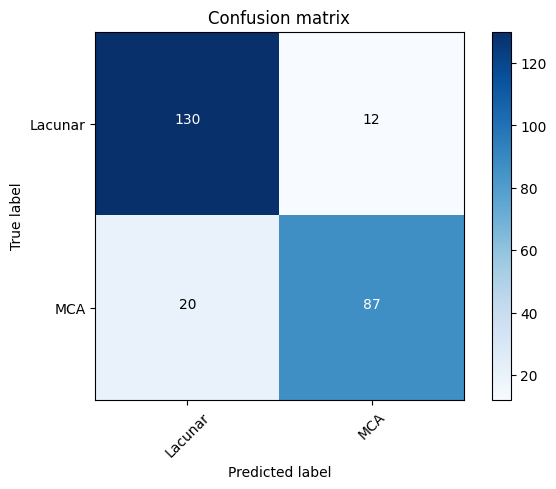

Normalized confusion matrix


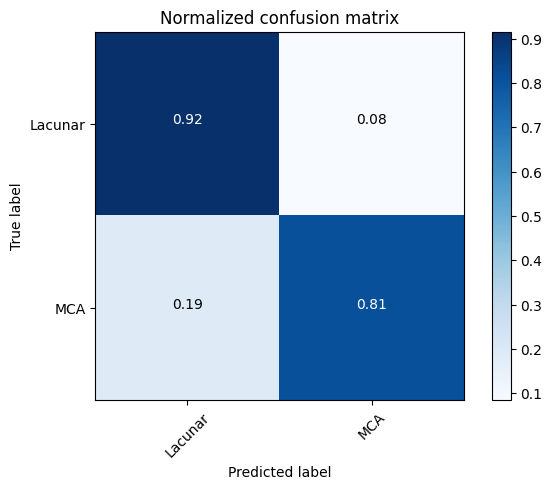

In [ ]:
predicted_target, actual_target = evaluate_specific_model(X, y)
plot_confusion_matrix(predicted_target, actual_target)

## Test prediction !?

In [ ]:
# cargar la base
def load_dataset(full_path):
    # cargar como numpy array
    data = read_csv(full_path)
    data = data.values
    print(data)
    # split input - output 
    X, y = data[:, :-1], data[:, -1]
    # clases 0 y 1
    y = LabelEncoder().fit_transform(y)
    return X, y

In [ ]:
full_path = '/content/drive/MyDrive/integradora_fiec/datasets/csv/20201225_mca_and_lacunar.csv'

In [ ]:
X, y = load_dataset(full_path)

[[1.08000000e+03 8.98987808e+01 4.30134900e-01 ... 1.24714345e+02
  7.81609094e+01 0.00000000e+00]
 [2.02200000e+03 9.51588058e+01 1.35011350e+00 ... 1.24087514e+02
  1.26236012e+02 0.00000000e+00]
 [3.36000000e+02 8.31819153e+01 1.16081287e-01 ... 1.13198584e+02
  6.65797069e+01 0.00000000e+00]
 ...
 [7.27900000e+03 9.11371231e+01 1.04778311e+00 ... 1.15209729e+02
  6.65553382e+01 1.00000000e+00]
 [2.16390000e+04 9.77653656e+01 1.02413774e+01 ... 1.17543672e+02
  1.25858838e+02 0.00000000e+00]
 [8.43300000e+03 9.63045959e+01 5.46200848e+00 ... 1.26903079e+02
  7.13877821e+01 0.00000000e+00]]


In [ ]:
#y[55] -> 1
#y[59] -> 1

#y[52] -> 0
#y[53] -> 0
X[55], X[59]

(array([1.20720000e+05, 9.90288010e+01, 2.02001708e+01, 1.34703163e+08,
        7.33112242e+01, 1.15475155e+02, 1.46575685e+02]),
 array([8.57200000e+03, 3.89640719e-01, 5.05314744e-05, 8.83901200e+06,
        1.20361492e+02, 1.09528212e+02, 1.36125785e+02]))

In [ ]:
model = RandomForestClassifier(n_estimators=1000)
pipeline = Pipeline(steps=[('p',PowerTransformer()), ('m',model)])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 7), (160,), (41, 7), (41,))

In [ ]:
# entrenar model
pipeline.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(memory=None,
         steps=[('p',
                 PowerTransformer(copy=True, method='yeo-johnson',
                                  standardize=True)),
                ('m',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
      

In [ ]:
from joblib import dump, load
path= '/content/drive/MyDrive/integradora_fiec/modelos/' + 'pipeline_random_forest_95_acc.joblib'
dump(pipeline, path)

['/content/drive/MyDrive/integradora_fiec/modelos/pipeline_random_forest_95_acc.joblib']

In [ ]:
_pipeline = load(path)

In [ ]:
# evaluar unos casos(class 0)
data = [
        [1.67000000e+02, 7.88906326e+01, 7.78532179e-02, 8.67525700e+06,
        8.29662079e+01, 1.22525581e+02, 7.00238445e+01],
        [3.99000000e+02, 8.65921783e+01, 1.64175692e-01, 8.67542300e+06,
        9.49797327e+01, 1.16707743e+02, 1.20460677e+02]
]
for row in data:
    # predicciones
    yhat = _pipeline.predict([row])
    print(_pipeline.predict_proba([row]))
    # obtener label
    label = yhat[0]
    # resumen
    print('>Predicción=%d (esperado 0)' % (label))

[[0.985 0.015]]
>Predicción=0 (esperado 0)
[[0.991 0.009]]
>Predicción=0 (esperado 0)


In [ ]:
# evaluate on some  (known class 1)
data = [
[1.20720000e+05, 9.90288010e+01, 2.02001708e+01, 1.34703163e+08,
        7.33112242e+01, 1.15475155e+02, 1.46575685e+02],
 [8.57200000e+03, 3.89640719e-01, 5.05314744e-05, 8.83901200e+06,
        1.20361492e+02, 1.09528212e+02, 1.36125785e+02]
    ]
for row in data:
    # predicciones
    yhat = pipeline.predict([row])
    # obtener label
    label = yhat[0]
    # resumen
    print('>Predicción=%d (esperado 1)' % (label))

>Predicción=1 (esperado 1)
>Predicción=1 (esperado 1)


## Test prediction for prod !?

In [ ]:
import SimpleITK as sitk
import scipy
def volume(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  pixel_volume = img.GetSpacing()[0] * img.GetSpacing()[1] * img.GetSpacing()[2]
  return (array > 0).sum() * pixel_volume

def max(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetMaximum()

def variance(img: sitk.Image):
  f = sitk.StatisticsImageFilter()
  f.Execute(img)
  return f.GetVariance()

def MorphologicalWatershed_(img: sitk.Image):
  transformed = sitk.MorphologicalWatershed(img)
  array = sitk.GetArrayFromImage(transformed)

  f = sitk.StatisticsImageFilter()
  f.Execute(transformed)
  return f.GetSum()

def Z_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[0]

def X_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[1]

def Y_(img: sitk.Image):
  array = sitk.GetArrayFromImage(img)
  coords = scipy.ndimage.measurements.center_of_mass(array)
  return coords[2]

def get_feature_vector(img : sitk.Image):
  fn = [
    volume,
    max,
    variance,
    MorphologicalWatershed_,
    Z_,
    X_,
    Y_
  ]
  return [f(img) for f in fn]


In [ ]:
import joblib
path= '/content/drive/MyDrive/integradora_fiec/modelos/' + 'pipeline_random_forest_95_acc.joblib'
_pipeline = joblib.load(path)

In [ ]:
xpath = '/content/c0003s0005t01_t1w_stx.nii.gz'
ypath = '/content/c0003s0005t01_t1w_stx_maskGenerated.nii.gz'


In [ ]:
ximg = sitk.ReadImage(xpath, sitk.sitkFloat32)
yimg = sitk.ReadImage(ypath, sitk.sitkFloat32)
yimg = sitk.Divide(yimg, 255.0) # because mask comes with values in {255,0}

masked = sitk.Multiply(ximg, yimg)

feature_row = get_feature_vector(masked)


pred = _pipeline.predict_proba([feature_row])
{
    'Lacunar' : pred[0][0],
    'MCA' : pred[0][1]
}

{'Lacunar': 0.981, 'MCA': 0.019}